Informasi Data Diri
- Nama: Agung Yoga Setiawan
- TTL: 2 April 2001
- Alamat: Jln.HKSN Komplek Herlina Banjarmasin
- Universitas Islam Kalimantan Muhammad Arsyad Al-Banjari Banjarmasin (Semester 4)

import library yang dibutuhkan

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mempersiapkan dataset rockpapersciccors

In [3]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-05-31 14:28:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.50MB/s    in 89s     

2021-05-31 14:29:59 (3.46 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak dataset yang sudah diunduh tadi

In [6]:
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')

In [7]:
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

Menampung direktori setiap kelas ke train direktori dan validation direktori

In [9]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

print("Jumlah Gambar Batu: " , len(os.listdir(rock_dir)))
print("Jumlah Gambar Kertas: " , len(os.listdir(paper_dir)))
print("Jumlah Gambar Gunting: " , len(os.listdir(scissors_dir)))

Jumlah Gambar Batu:  726
Jumlah Gambar Kertas:  712
Jumlah Gambar Gunting:  750


Step selanjutnya adalah melakukan ImageDataGenerator
melakukan proses augmentasi gambar pada setiap sampel dataset
- augmentasi gambar dapat membuat data baru dari data yang ada

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split = 0.4)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 20,
                                  horizontal_flip = True,
                                  shear_range = 0.2,
                                  validation_split = 0.4)

Mempersiapkan data latih yang sudah dipelajari model

In [11]:
train_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membuat arsitektur CNN
- layer konvolusi adalah mengekstrasi atribut pada gambar
- max pooling adalah berguna untuk mereduksi resolusi gambar 

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

Selanjutnya adalah mengcompile objek pada model

In [23]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

melatih model dengan metode fit dan dengan menggunakan ImageDataGenerator otomatis melabeli sebuah gambar dengan direktori mana ia disimpan

In [24]:
mymodel = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/20
25/25 - 40s - loss: 1.1175 - accuracy: 0.3587 - val_loss: 1.0365 - val_accuracy: 0.4688
Epoch 2/20
25/25 - 37s - loss: 1.0227 - accuracy: 0.5286 - val_loss: 0.7498 - val_accuracy: 0.8359
Epoch 3/20
25/25 - 38s - loss: 0.6754 - accuracy: 0.7506 - val_loss: 0.4503 - val_accuracy: 0.8516
Epoch 4/20
25/25 - 38s - loss: 0.4259 - accuracy: 0.8429 - val_loss: 0.2617 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 39s - loss: 0.3641 - accuracy: 0.8700 - val_loss: 0.2608 - val_accuracy: 0.8906
Epoch 6/20
25/25 - 37s - loss: 0.2779 - accuracy: 0.9013 - val_loss: 0.3121 - val_accuracy: 0.8906
Epoch 7/20
25/25 - 39s - loss: 0.2865 - accuracy: 0.9025 - val_loss: 0.2272 - val_accuracy: 0.8984
Epoch 8/20
25/25 - 37s - loss: 0.2799 - accuracy: 0.9130 - val_loss: 0.3330 - val_accuracy: 0.8594
Epoch 9/20
25/25 - 38s - loss: 0.2507 - accuracy: 0.9104 - val_loss: 0.1358 - val_accuracy: 0.9453
Epoch 10/20
25/25 - 39s - loss: 0.1673 - accuracy: 0.9337 - val_loss: 0.0767 - val_accuracy: 0.9688
Epoch 11/

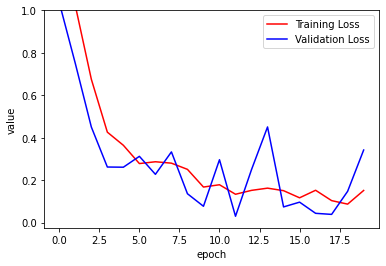

In [33]:
# melihat grafik loss dan val_loss
import matplotlib.pyplot as plt


plt.plot(mymodel.history['loss'],'r',label='Training Loss')
plt.plot(mymodel.history['val_loss'],'b',label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(loc='best')
plt.ylim(ymax=1)
plt.show()

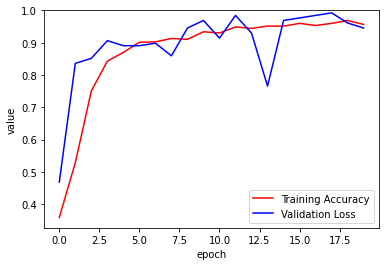

In [34]:
# melihat grafik accuracy dan val_accuracy
import matplotlib.pyplot as plt


plt.plot(mymodel.history['accuracy'],'r',label='Training Accuracy')
plt.plot(mymodel.history['val_accuracy'],'b',label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(loc='best')
plt.ylim(ymax=1)
plt.show()

melihat kelas train_generator

In [39]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


kemudian melakukan resize pada gambar yang kita pilih dan mengubah menjadi numpy array lalu dari gambar yang kita upload akan menampilkan hasilnya berdasarkan apa yang sudah dilatih oleh model

Saving tangan.jpeg to tangan (2).jpeg
tangan.jpeg
Kertas


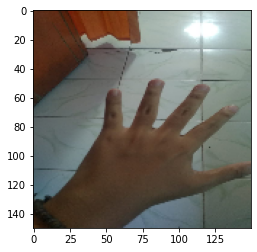

In [62]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for up in uploaded.keys():
  # predict image
  path = up
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  result = np.argmax(classes)


  print(up)

  if result == 0:
    print('Kertas')
  elif result == 1:
    print('Rock')
  else:
    print('Gunting')

Sumber belajar dan referensi
- https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=LWTisYLQM1aM
- Youtube Hobi Data https://www.youtube.com/watch?v=nzlv4S7L4nw&t=1s
- Youtube Elektro Programming https://www.youtube.com/watch?v=SI1BW5ax5Qs&t=0s